# Analiza vin

V zvezku so predstavljeni rezultati analize podatkov o vinu s strani [Wine Library](https://winelibrary.com/search?page=1&search=).

###### Za vsako vino smo zajeli:
* ime vina
* zaporedna številka (id) vina
* sorta vina
* država izvora
* leto ustekleničenja
* prostornina buteljke
* položaj na lestvici popularnosti
* ocena profesionalca
* cena (in popust)
* opis
* kratka recenzija
* regija in podregija
* barva 
* procent alkohola
* način zapiranja buteljke
* okus in vonj

##### Hipoteze in vprašanja:
* Najboljša vina so daleč od najbolj popularnih
* 750ml je najbolj popularna in najbolje ocenjena velikost buteljke
* Katero leto je bilo najboljše za vino?
* Katera država je "najboljša", kar se tiče vin?
* Katera je najbolj popularna sorta?
* Kateri okusi so najbolj priljubljeni?
* Ljudje preferirajo belo vino

## Uvoz in predobdelava

In [1]:
# naložimo vse potrebne knjižnice
import pandas as pd
import matplotlib.pyplot as plt

# za izrisovanje grafov
%matplotlib inline

In [2]:
# preberemo naše podatke
vina = pd.read_csv('obdelani_podatki/vina.csv')
detajli = pd.read_csv('obdelani_podatki/detajli.csv')
okusi = pd.read_csv('obdelani_podatki/okusi.csv')
vonjave = pd.read_csv('obdelani_podatki/vonjave.csv')

In [3]:
# tabela master je največja - vsebuje vse naše podatke
senses = pd.merge(okusi, vonjave)
vina_senses = pd.merge(vina, senses)
master = pd.merge(vina_senses, detajli).set_index('id')
master

,leto,ime,sorta,drzava,velikost,znizana_cena,cena,ocena,ocenjevalec,okus,vonj,regija,podregija,barva,alkohol,zamasek,opis,recenzija,popularnost
id,,,,,,,,,,,,,,,,,,,
119920,2019.0,Julien Sunier Regnie,Gamay,France,750,28.99,35.99,NaN,NaN,cherry,violet,Beaujolais,Beaujolais Cru,Red,NaN,Cork,"This Beaujolais’ cru, often underestimated, do...",NaN,1426
119920,2019.0,Julien Sunier Regnie,Gamay,France,750,28.99,35.99,NaN,NaN,cherry,rose,Beaujolais,Beaujolais Cru,Red,NaN,Cork,"This Beaujolais’ cru, often underestimated, do...",NaN,1426
119920,2019.0,Julien Sunier Regnie,Gamay,France,750,28.99,35.99,NaN,NaN,cherry,petal,Beaujolais,Beaujolais Cru,Red,NaN,Cork,"This Beaujolais’ cru, often underestimated, do...",NaN,1426
119920,2019.0,Julien Sunier Regnie,Gamay,France,750,28.99,35.99,NaN,NaN,cherry,oak,Beaujolais,Beaujolais Cru,Red,NaN,Cork,"This Beaujolais’ cru, often underestimated, do...",NaN,1426
119920,2019.0,Julien Sunier Regnie,Gamay,France,750,28.99,35.99,NaN,NaN,cherry,smoke,Beaujolais,Beaujolais Cru,Red,NaN,Cork,"This Beaujolais’ cru, often underestimated, do...",NaN,1426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115878,2016.0,Casa Piena Cabernet Sauvignon,Cabernet Sauvignon,United States,750,139.99,174.99,96.0,Antonio Galloni - Vinous,vanilla,blackberry,California,Napa,Red,14.7,Cork,2016 was a particularly giving vintage for Cas...,Casa Piena's 2016 Cabernet Sauvignon has turne...,1425
115878,2016.0,Casa Piena Cabernet Sauvignon,Cabernet Sauvignon,United States,750,139.99,174.99,96.0,Antonio Galloni - Vinous,vanilla,cherry,California,Napa,Red,14.7,Cork,2016 was a particularly giving vintage for Cas...,Casa Piena's 2016 Cabernet Sauvignon has turne...,1425
115878,2016.0,Casa Piena Cabernet Sauvignon,Cabernet Sauvignon,United States,750,139.99,174.99,96.0,Antonio Galloni - Vinous,vanilla,cedar,California,Napa,Red,14.7,Cork,2016 was a particularly giving vintage for Cas...,Casa Piena's 2016 Cabernet Sauvignon has turne...,1425


In [4]:
# ker se v master vina ponavljajo, naredimo še tabelo brez okusov in vonjav, 
# ki je bolj sprejemljive velikosti
vina = pd.merge(vina, detajli).set_index('id')
vina

,leto,ime,sorta,drzava,velikost,znizana_cena,cena,ocena,ocenjevalec,regija,podregija,barva,alkohol,zamasek,opis,recenzija,popularnost
id,,,,,,,,,,,,,,,,,
119920,2019.0,Julien Sunier Regnie,Gamay,France,750,28.99,35.99,NaN,NaN,Beaujolais,Beaujolais Cru,Red,NaN,Cork,"This Beaujolais’ cru, often underestimated, do...",NaN,1426
118777,2019.0,Vina Gonzalez Bastias Naranjo Valle De Maule (...,Blend,Chile,750,29.99,34.99,NaN,NaN,Central Valley,Maule,Orange,13.0,Cork,"A blend of Moscatel, Torrontel and País. The M...",NaN,1427
119906,2019.0,Izadi Rioja Bianco,Blend,Spain,750,19.99,25.00,NaN,NaN,La Rioja,Rioja,White,13.5,Cork,Straw yellow in colour with bright green tones...,NaN,1428
114983,2016.0,Lamy Pillot Morgeot Chassagne Montrachet,Pinot Noir,France,750,44.99,60.00,NaN,NaN,Burgundy,Chassagne Montrachet,Red,13.0,Cork,A wine as good as many 1er crus from their nei...,NaN,1429
118255,2018.0,Jules Pierre Macon Villages,Chardonnay,France,750,19.99,25.00,NaN,NaN,Burgundy,Macon-Villages,White,12.5,Cork,Fresh and fruit-driven white wine capturing th...,NaN,1430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112603,2017.0,Giraud Les Grenaches De Pierre Chateauneuf Du ...,Grenache / Garnacha,France,750,99.99,162.99,96.0,Joe Czerwinski - Robert Parker&#39;s Wine Advo...,Rhone,Chateauneuf du Pape,Red,15.5,Cork,NaN,"Full-bodied yet silky, elegant and positively ...",1421
112025,2015.0,Philippe Gimel St Jean Du Barroux L'argile,Blend,France,750,26.80,34.99,93.0,Jeb Dunnuck - jebdunnuck.com,Rhone,Cotes du Ventoux,Red,14.5,Cork,NaN,"The 2015 L'Argile spent 24 months in concrete,...",1422
118326,2017.0,Pichler Krutzler Klostersatz Gruner Veltliner,Gruner Veltliner,Austria,750,27.99,35.00,92.0,Wine Enthusiast,Niederosterreich-Lower Austria,Wachau,White,12.5,Screwtop,Pichler-Krutzler from Austria’s famed Wachau r...,Reduction and yeast vie for attention with rou...,1423


## Analiza

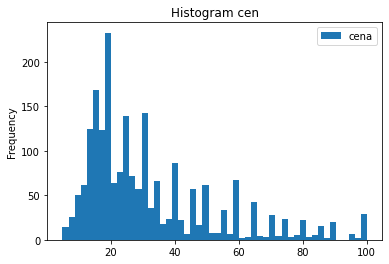

In [5]:
# popularsnost cen (pod 100)
vina[vina.cena <= 100].plot.hist(y='cena', bins=50, title='Histogram cen');

Za začetek enostavno pogledamo kako so porazdeljene cene na strani. Višjih cen od 100 EUR ne upoštevamo, saj popačijo izgled. Vidimo, da se cene v večini gibljejo med 15 in 35 EUR ter da so cene rade zaokrožene - kot je vidno iz velikih skokov pri okroglih številih.

### Popularnost in ocene

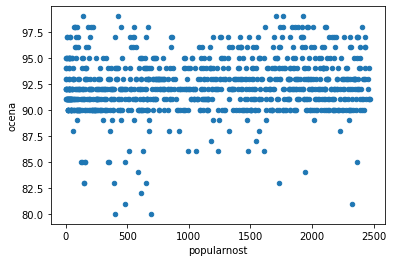

In [6]:
# stran damo ocene, manjše od 10, saj uporabljajo drugačno lestvico
vina[vina.ocena > 10].plot.scatter(x='popularnost', y='ocena');

In [7]:
r = vina[vina.ocena > 10][['popularnost', 'ocena']].corr()
r

,popularnost,ocena
popularnost,1.000000,0.131627
ocena,0.131627,1.000000


Vidimo, da ni pretirane povezave med popularnostjo vina in njegovo oceno. To je verjetno posledica tega, da prodajalna Wine Library prodaja večinoma samo kvalitetna in dobro ocenjena vina. 

Našo opazko tudi empirično potrdi Pearsonov korelacijski koeficient, ki znaša 0.13, kar pomeni, da med spemenljivkama ni zares močne korelacije. Na podlagi tega prvo hipotezo težko ovržemo ali potrdimo. Sigurno ne velja, da so najboljša vina daleč od najboljših, a tudi obratno težko zatrdimo - Wine library očitno res prodaja samo popularna in kvalitetna vina.

### Velikost buteljke in vrsta zamaška

Predvidevamo, da je delač najbolj priljubljena velikost 750 ml in zato tudi najbolje ocenjena. Podobno pričakujemo s plutastim ("cork") zamaškom.

In [8]:
vina.groupby('velikost').size().sort_values()

velikost
3         1
187       4
500       7
250      11
1        32
375     115
750    2095
dtype: int64

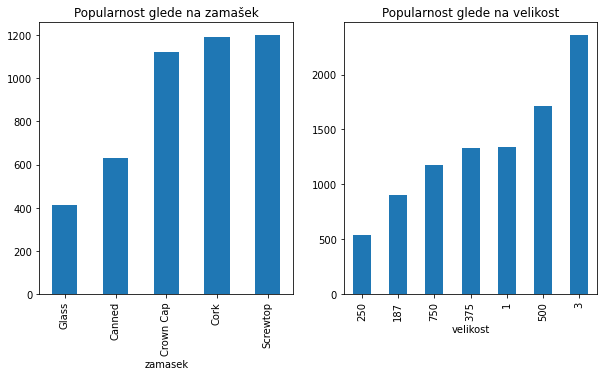

In [9]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
vina.groupby('zamasek').mean()['popularnost'].sort_values().plot.bar(title='Popularnost glede na zamašek');

plt.subplot(1, 2, 2)
vina.groupby('velikost').mean()['popularnost'].sort_values().plot.bar(title='Popularnost glede na velikost');

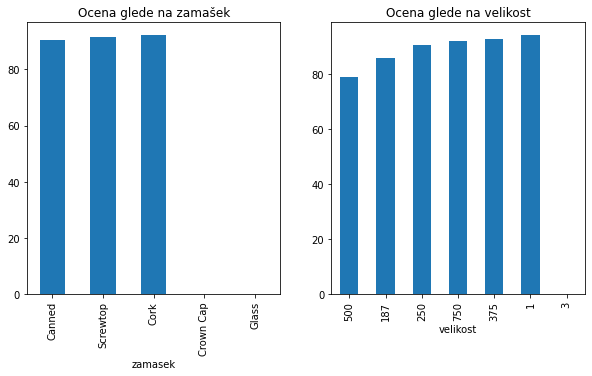

In [10]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
vina.groupby('zamasek').mean()['ocena'].sort_values().plot.bar(title='Ocena glede na zamašek');

plt.subplot(1, 2, 2)
vina.groupby('velikost').mean()['ocena'].sort_values().plot.bar(title='Ocena glede na velikost');

Takoj opazimo, da se velikost 750 ml pojavi več kot 2000-krat, kar res zajema veliko večino vseh vin, zato ni čudno, da je v povprečju približno 1100. po popularnosti (to je namreč ravno polovica vseh vin). Presenetljivo pa je, da je popularna tudi velikost 250 ml; res da imajo le 11 tovrstnih vin, a v povprečju so najbolj popularna. Mislimo pa, da vseeno lahko potrdimo hipotezo o popularnostivin z velikostjo 750 ml, kar ni presenetljivo.

Očitno je, da sta v povprečju bolje ocenjeni velikosti 375 ml in 1 l. Torej prvo hipotezo o butelki velikosti 750 ml potrdimo, drugo pa ovržemo.

In [11]:
vina.groupby('zamasek').size().sort_values()

zamasek
Glass           3
Crown Cap       8
Canned         14
Screwtop      352
Cork         1878
dtype: int64

Hitro omenimo še nepresenetljivo popularnost in premoč plutastih zamaškov, kar nas ne preseneča. Zanimivo se nam zdi, da je tudi med temi, bolj "elitnimi" vini vseeno nekaj zamaškov z navojem. Izstopajo tudi vina v pločevinki, ki jih je bolj malo, a so očitno precej popualrni in malce slabše ocenjeni. 

### Vina skozi leta

<AxesSubplot:title={'center':'Povprečcna ocena skozi leta'}, xlabel='leto'>

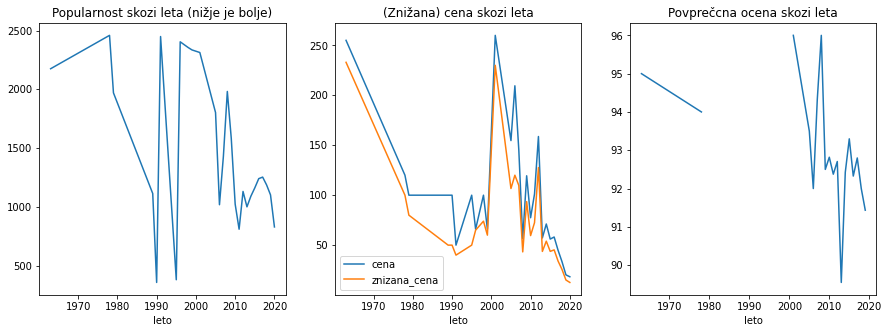

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
vina.groupby('leto').mean()['popularnost'].plot(title='Popularnost skozi leta (nižje je bolje)')

plt.subplot(1, 3, 2)
vina.groupby('leto').mean()['cena'].plot(title='(Znižana) cena skozi leta', legend=True)
vina.groupby('leto').mean()['znizana_cena'].plot(legend=True)

plt.subplot(1, 3, 3)
vina.groupby('leto').mean()['ocena'].plot(title='Povprečcna ocena skozi leta')

In [13]:
vina.groupby('leto').size()

leto
1963.0      1
1978.0      1
1979.0      2
1989.0      1
1990.0      1
1991.0      1
1995.0      1
1996.0      1
1998.0      1
1999.0      1
2001.0      1
2005.0      3
2006.0      2
2007.0      4
2008.0      4
2009.0      7
2010.0     14
2011.0     18
2012.0     22
2013.0     46
2014.0     84
2015.0    164
2016.0    315
2017.0    444
2018.0    563
2019.0    301
2020.0      3
dtype: int64

Vidimo, da so vsi grafi precej zobati, zato težko naredimo kakšen konkreten sklep. Iz preštetih vin po letih vidimo tudi, da nimamo najboljšega vzorca. Vidimo pa lahko, da je cena vin iz 2000-2010 najvišja in da so starejša vina v povprečju bolje ocenjena.

Prav tako je nepresenetljivo, da so novejša vina bolj popuarna - so bolj dostopna in tudi več različnih se prodaja. Je pa vseen mogoče opaziti trend: novejša vina so vedno slabše ocenjena in vedno cenejša, a tudi vedno bolj popularna (predvsem, če gledamo samo zadnje desetletje).

### Popularnost po barvah

Naša hipoteza je, da ljudje preferirajo belo vino.

In [14]:
# količina vin posamezne barve
vina.groupby('barva').size().sort_values()

barva
Mixed        3
Orange       6
Rose       127
White      832
Red       1297
dtype: int64

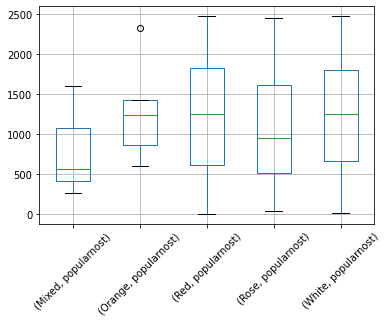

In [15]:
# očitno se pojavi nek problem s podvojitvami indeksov
vina.loc[~vina.index.duplicated(keep='first')].groupby('barva').boxplot(
    column='popularnost', subplots=False, rot=45);

Vidimo, da se med 2265 najbolj popularnimi vini največkrat pojavijo rdeča. Na grafu pa vidimo, da so najbolj popularna mešana - a to v kombinaciji s tabelo ni relevantno, saj je mešanih vin precej malo. V povprečju najbolj popularna sorta je očitno rosé. 

Vseeno rdeče vino premaga belo, zato lahko ovržemo hipotezo, da je belo vino najbolj popularno, ta prestol očitno pripada rdečemu vinu, če gledamo količinsko oz. rose-ju, če se osredotočimo na povprečja (težko bi argumentirali za mešano ali oranžno, saj je teh vnosov precej malo - mali razpon na grafu je tudi torej posledica tega). 

### Sorte

Zanima nas, katera sorta je najbolj popularna.

In [16]:
vina.groupby('sorta').mean()['popularnost'].sort_values()

sorta
Graciano             15.5
Isabella            155.0
Raboso Veronese     212.0
Malagousia          280.0
Dornfelder          290.0
                    ...  
Vaccarese          2314.0
Pecorino           2357.5
Nero D'avola       2381.0
Verdejo            2423.0
Plum               2432.0
Name: popularnost, Length: 124, dtype: float64

V povprečju najbolj popularna sorta je Graciano. V povprečju je dosegla kar 15,5. mesto na lestvici. 

In [17]:
vina.groupby('sorta').count()['popularnost'].sort_values()

sorta
Torrontes                   1
Treixadura / Trajadura      1
Plum                        1
Hondarribi Beltza           1
Inzolia                     1
                         ... 
Sauvignon Blanc           113
Cabernet Sauvignon        163
Pinot Noir                228
Chardonnay                234
Blend                     749
Name: popularnost, Length: 124, dtype: int64

Največkrat pa se pojavijo nekatere bolj znane sorte, kot so Chardonnay in Cabernet Sauvignon. Zdi se torej, da ljudje velikokrat kupijo bolj eksotične sorte, povpraševanje na trgu v celoti pa vseeno zahteva tudi bolj navadne.

### Države in regije

In [18]:
drzave = vina.groupby('drzava').mean()[['ocena', 'cena', 'popularnost']].sort_values('popularnost')
drzave['count'] = vina.groupby('drzava').count()['popularnost']
drzave.sort_values('count')

,ocena,cena,popularnost,count
drzava,,,,
Wine Gifts,NaN,471.880000,258.000000,1
Uruguay,NaN,19.000000,912.000000,1
Canada,94.000000,59.990000,1753.000000,1
Lebanon,NaN,21.990000,1016.000000,1
Moldova,NaN,9.980000,1089.000000,1
Belarus,NaN,9.980000,737.500000,2
Japan,NaN,15.490000,1777.500000,2
Slovenia,NaN,15.496667,1668.000000,3
Armenia,NaN,33.333333,1830.000000,3


Torej v povprečju najdražja vina prihajajo iz Madžarske, najvišje ocenjena so kanadska vina, v povprečju najbolj popularna vina pa so iz Belorusije.

Ko se ozremo nazaj in podrobneje pogledamo, da so vse cene v dolarjih, takoj postane jasno, da bo največ vin prav iz ZDA. Drugače pa v vrhu ni presenečenj. Zanimivo je omeniti, da smo tudi Slovenci spravili tri vina na seznam.

Težko torej določimo enega samega zmagovalca, kar se tiče držav.

In [19]:
# kot zanimivost
vina[vina.drzava == 'Slovenia']

,leto,ime,sorta,drzava,velikost,znizana_cena,cena,ocena,ocenjevalec,regija,podregija,barva,alkohol,zamasek,opis,recenzija,popularnost
id,,,,,,,,,,,,,,,,,
115339,2016.0,Krasno Sauvignonasse,Sauvignon Blanc,Slovenia,750,15.99,20.00,NaN,NaN,Slovenia,Slovenia,White,13.5,Cork,An indigenous variety from Brda. Field flowers...,NaN,1937
116811,NaN,Rasno Goriska Brda Sparkling Rebula,Ribolla Gialla,Slovenia,750,14.99,20.00,NaN,NaN,Slovenia,Slovenia,White,12.0,Cork,Hints of mediterranean herbs lead to a palate ...,NaN,836
85439,NaN,Avia Riesling,Riesling,Slovenia,750,4.98,6.49,NaN,NaN,Slovenia,Slovenia,White,12.0,Screwtop,"Floral, Pleasant apple and melon notes and lig...",NaN,2231


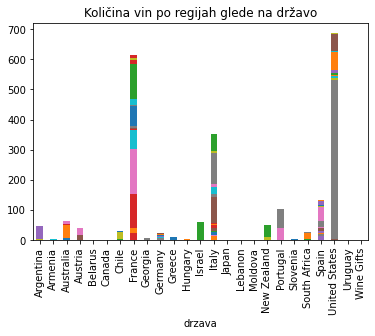

In [20]:
vina.groupby(['drzava', 'regija']).count()['popularnost'].sort_values().unstack(level=1).plot.bar(
    stacked=True, legend=False, title='Količina vin po regijah glede na državo');

Vidimo, da v ZDA prevladuje ena regija - California, medtem ko imajo druge velike vinske dežele več močnih regij. To je verjetno posledica podnebja - večji del npr. Italije in Francije ima ugodno podnebje (in prst) za vinske trte kot pa ZDA.

### Okusi

Zanima nas kateri okusi so najbolj popularni oz. najdražji. 

In [21]:
master.groupby('okus').size().sort_values()

okus
orchard           3
flowers           3
herbs             4
candy             4
kirsch            4
              ...  
pepper        11066
blackberry    12254
currant       13151
vanilla       14183
cherry        17553
Length: 220, dtype: int64

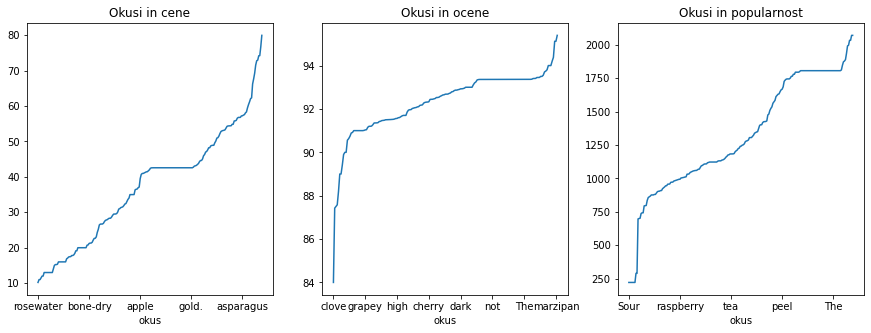

In [22]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
master.groupby('okus').mean().sort_values('cena')['cena'].plot(title='Okusi in cene');

plt.subplot(1, 3, 2)
master[master.ocena > 10].groupby('okus').mean().sort_values('ocena')['ocena'].plot(title='Okusi in ocene');

plt.subplot(1, 3, 3)
master.groupby('okus').mean().sort_values('popularnost')['popularnost'].plot(title='Okusi in popularnost');

Iz prvega grafa vidimo, da "slabi" okusi prinesejo nizko ceno in dobri visoko, velja pa skoraj nekakšna linearna odvisnost. Bolj zanimiv je drugi graf, ki pokaže da večina okusov dobi oceno okoli 92, potem pa imamo nekaj okusov, ki izstopajo navzgor in navzdol (primeri so tudi navedeni pod x osjo). Tretji graf ima podoben trend kot drugi, le da je manj izrazit. 

Čeprav so grafi malo nekonvencionalni, se nam vseeno zdijo zanimivi primerki okusov, ki jih vidimo na x osi. 

## Klasifikacija barve iz opisa

Za konec si poglejmo, kako dobro lahko napovemo barvo vina iz njegovega opisa. Seveda gre za klasifikacijski problem in zato bomo uporabili naivni Bayesov klasifikator, ki smo ga spoznali na predavanjih.

In [23]:
def koren_besede(beseda):
    beseda = ''.join(znak for znak in beseda if znak.isalpha())
    if not beseda:
        return '$'
    konec = len(beseda) - 1
    if beseda[konec] in 'ds':
        konec -= 1
    while konec >= 0 and beseda[konec] in 'aeiou':
        konec -= 1
    return beseda[:konec + 1]

def koreni_besed(niz):
    niz = str(niz)
    return pd.Series(sorted({
        koren_besede(beseda) for beseda in niz.replace('-', ' ').lower().split() if beseda
    }))

In [24]:
verjetnosti_barv = vina.groupby('barva').size() / len(vina)
verjetnosti_barv.sort_values()

barva
Mixed     0.001325
Orange    0.002649
Rose      0.056071
White     0.367329
Red       0.572627
dtype: float64

In [25]:
koreni_vin = vina.opis.apply(
    koreni_besed
).stack(
).reset_index(
    level='id'
).rename(columns={
    'id': 'vino',
    0: 'koren',
})

koreni_barv = pd.merge(koreni_vin, vina.barva, left_on='vino', right_on='id')[['koren', 'barva']]
pojavitve_korenov_po_barvah = pd.crosstab(koreni_barv.koren, koreni_barv.barva)
verjetnosti_korenov_po_barvah = pojavitve_korenov_po_barvah / vina.groupby('barva').size() + 0.001

verjetnosti_korenov_po_barvah.White.sort_values(ascending=False).head(20)

koren
an        0.931288
th        0.886817
          0.885615
of        0.844750
with      0.718548
win       0.595952
in        0.545471
t         0.473356
on        0.462538
winery    0.401240
$         0.390423
it        0.378404
fruit     0.376000
from      0.368788
not       0.360375
ar        0.356769
for       0.318308
that      0.314702
flavor    0.297875
finish    0.293067
Name: White, dtype: float64

In [26]:
def doloci_barvo(opis):
    faktorji_barv = verjetnosti_barv * verjetnosti_korenov_po_barvah[
        verjetnosti_korenov_po_barvah.index.isin(
            koreni_besed(opis)
        )
    ].prod()
    faktorji_barv /= max(faktorji_barv)
    return faktorji_barv.sort_values(ascending=False).head(5)

In [27]:
doloci_barvo('A deep velvety colour.')

barva
Red       1.000000e+00
White     2.056097e-02
Rose      6.010482e-03
Orange    7.248660e-06
Mixed     1.084047e-08
dtype: float64

## Zaključek

Nekaj hipotez smo potrdili in nekaj smo jih ovrgli. Na žalost smo imeli problem s precej neuravnoteženim vzorcem - velika koncentracija vin z nekaterimi specifičnimi lastnostmi in zelo malo vin z redkejšimi lastnostmi. Vseeno smo ugotovili nekaj zanimivih stvari.

Napačno smo mislili, da bo belo vino najbolj popularno, smo pa pravilno predpostavili dominantnost 750 ml velike buteljke. Ugotovili smo, da na ameriški strani prodajajo največ ameriških vin in da imajo ljudje očitno radi vina s priokusi vanilije in majhnih sadežev.